In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
cores = ["#fe4a49", "#2ab7ca", "#fed766", "#e6e6ea", "#f4f4f8"]
sns.set(font_scale=2, style="whitegrid")

In [179]:
dados_brutos = "../data_sampling/dados_brutos/%s"

In [180]:
df = pd.read_excel(dados_brutos%"customer_churn.xlsx")

In [181]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes


In [182]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [183]:
vars = df.columns[1:]

In [184]:
vars_cat = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Churn']

In [185]:
vars_num = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges"                
]

In [186]:
df.groupby("Churn")[vars_num].mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2555.344141
Yes,17.979133,74.441332,1531.796094


In [216]:
ax.get_yticklabels()

[Text(0, 0, '')]

C:\Users\Renan\AppData\Local\Temp\ipykernel_18852\3246666017.py:20: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.boxplot(data=p, x=v, hue="ref", palette=cores, ax=ax)
C:\Users\Renan\AppData\Local\Temp\ipykernel_18852\3246666017.py:20: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.boxplot(data=p, x=v, hue="ref", palette=cores, ax=ax)
C:\Users\Renan\AppData\Local\Temp\ipykernel_18852\3246666017.py:20: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.boxplot(data=p, x=v, hue="ref", palette=cores, ax=ax)


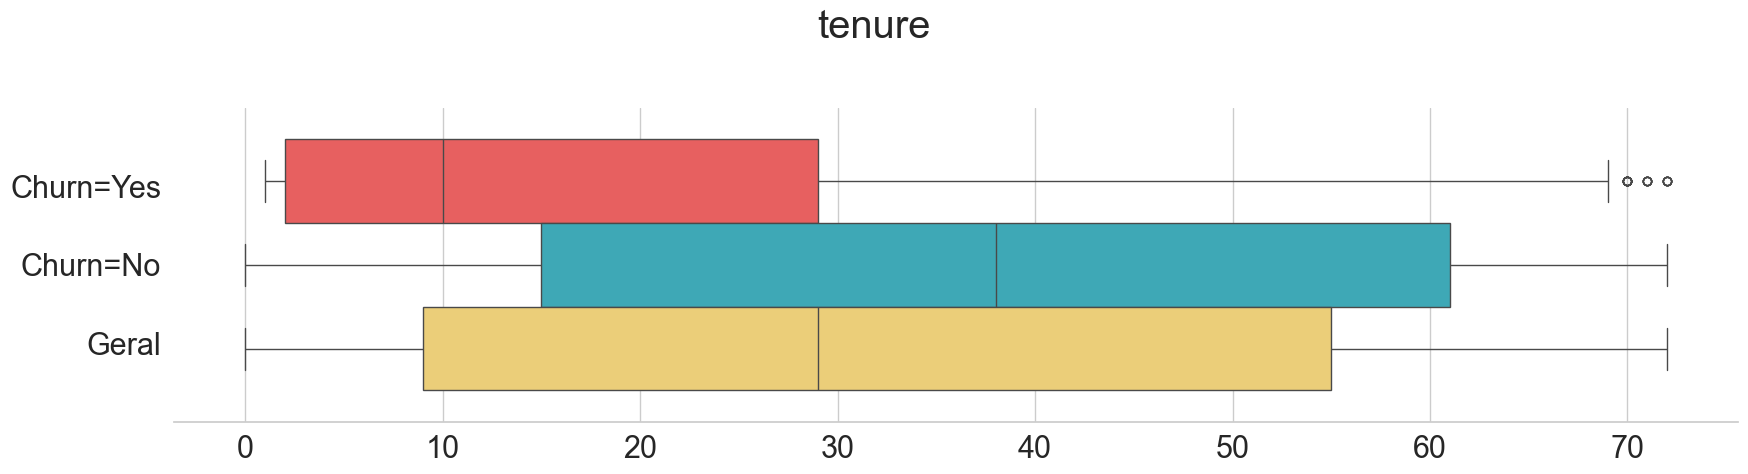

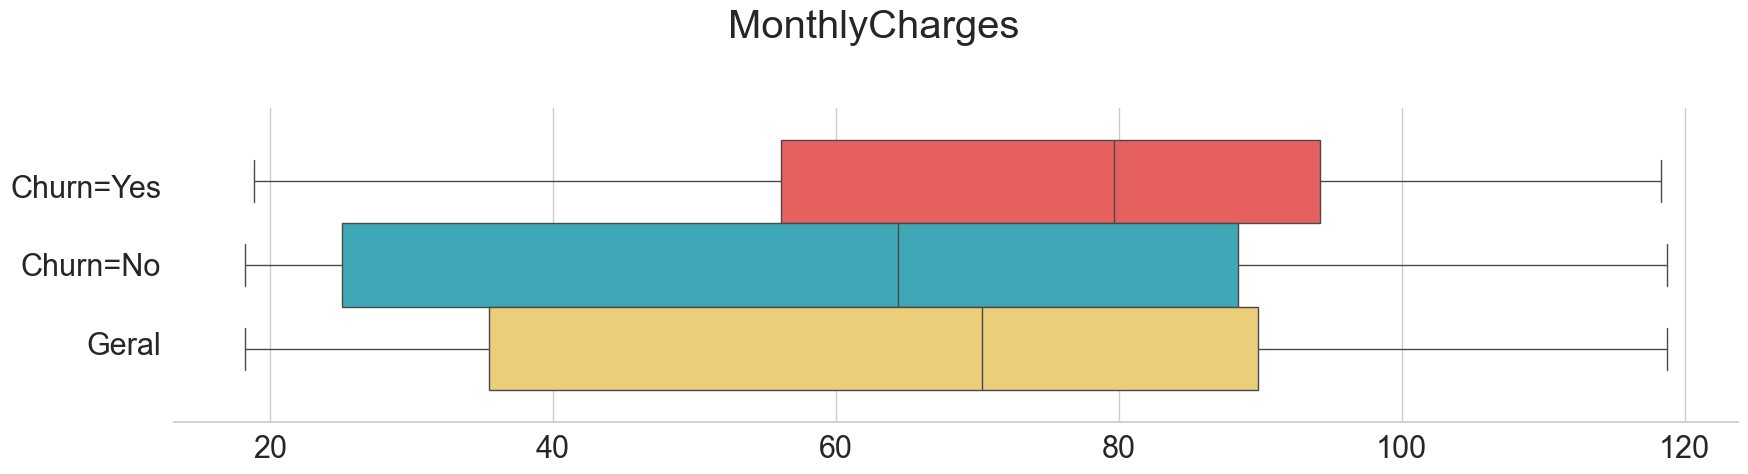

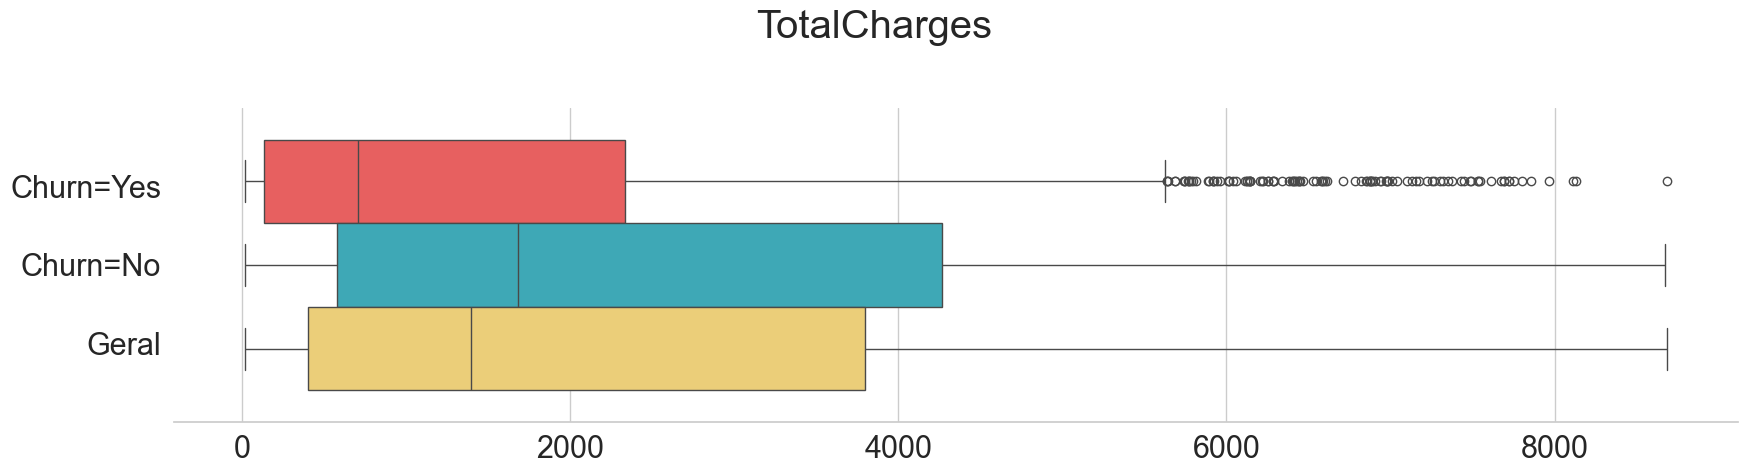

In [235]:
for v in vars_num:
    if v=="Churn":
        continue
    fig, ax = plt.subplots(figsize=(18,5), sharey=True)
    sns.despine(left=True)
    p1 = df[df["Churn"]=="Yes"].copy()
    # p1 = p1[v].value_counts(normalize=True, dropna=False).reset_index()
    p1["ref"] = "yes"

    p2 = df[df["Churn"]=="No"].copy()
    # p2 = p2[v].value_counts(normalize=True, dropna=False).reset_index()
    p2["ref"] = "no"

    # p3 = df[v].value_counts(normalize=True, dropna=False).reset_index()
    p3 = df.copy()
    p3["ref"] = "geral"

    p = pd.concat([p1,p2,p3], ignore_index=True)

    sns.boxplot(data=p, x=v, hue="ref", palette=cores, ax=ax)
    ax.set_yticks([-.25,0,.25], ['Churn=Yes', 'Churn=No', 'Geral'])
    ax.legend().remove()
    ax.set_xlabel("")

    fig.suptitle(v)
    fig.tight_layout()

C:\Users\Renan\AppData\Local\Temp\ipykernel_18852\2831433847.py:15: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(data=p3, x=v, y="proportion", hue=v, palette=cores, ax=ax[0])
C:\Users\Renan\AppData\Local\Temp\ipykernel_18852\2831433847.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(data=p1, x=v, y="proportion", hue=v, palette=cores, ax=ax[1])
C:\Users\Renan\AppData\Local\Temp\ipykernel_18852\2831433847.py:17: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(data=p2, x=v, y="proportion", hue=v, palette=cores, ax=ax[2])
C:\Users\Renan\AppData\Local\Temp\ipykernel_18852\2831433847.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(labs)
C:\Users\Renan\AppData\Local\Temp\ipykernel_18852\2831433847

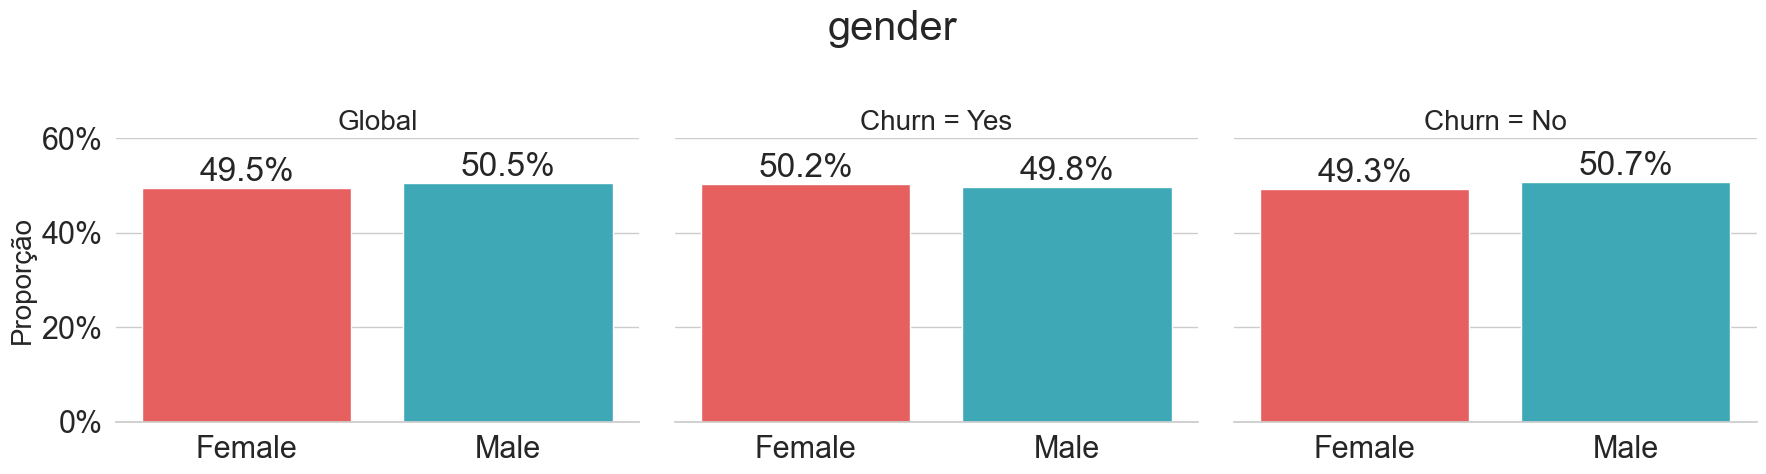

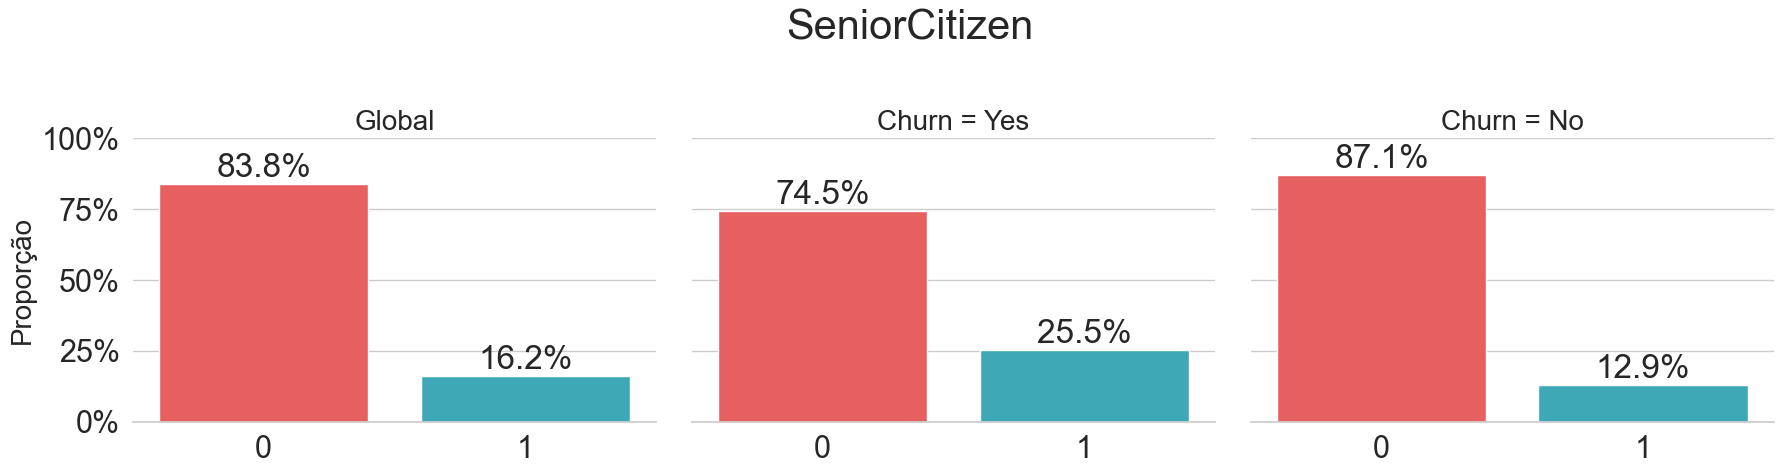

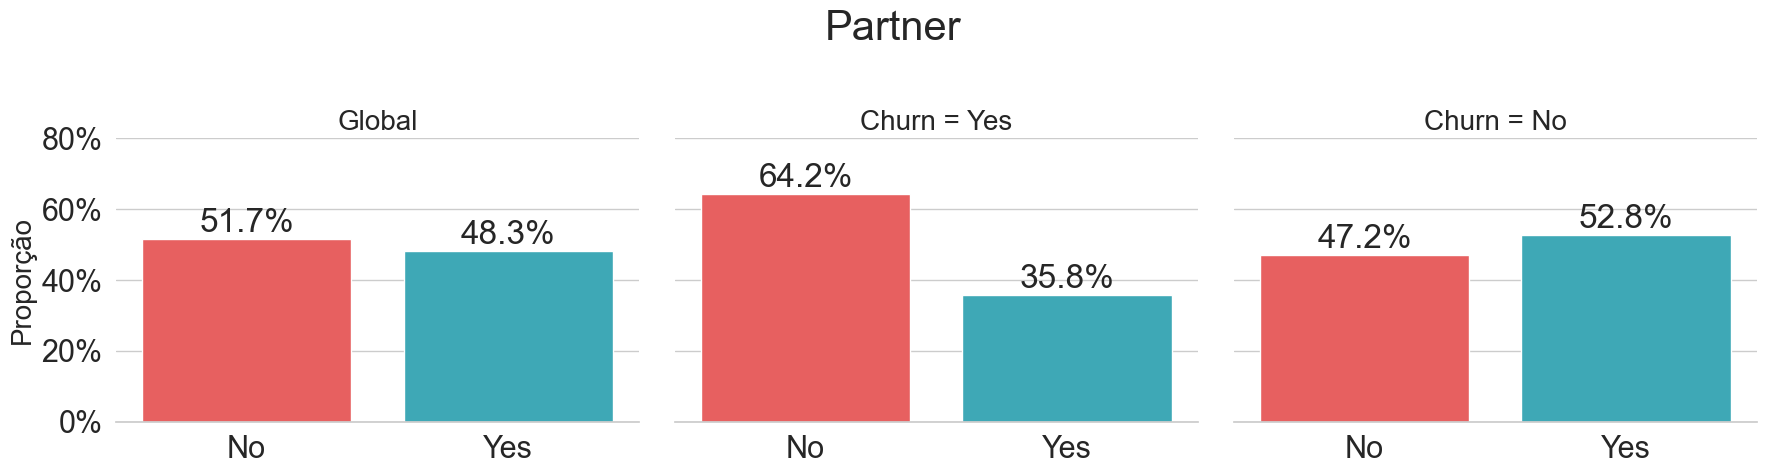

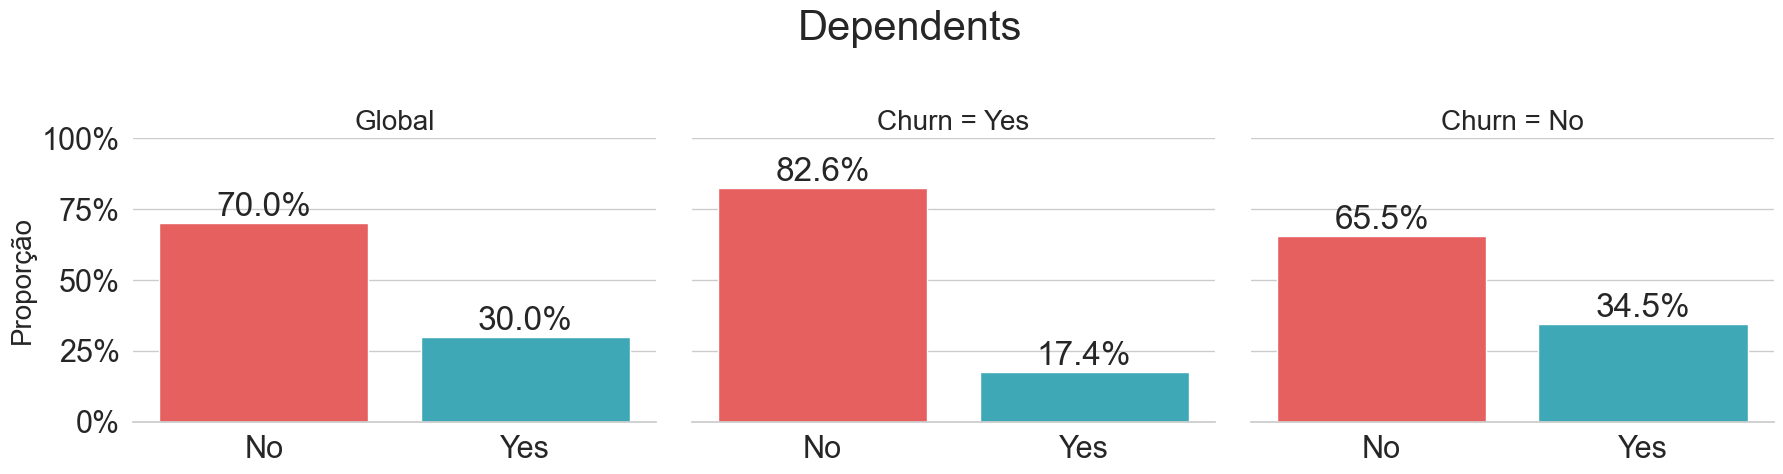

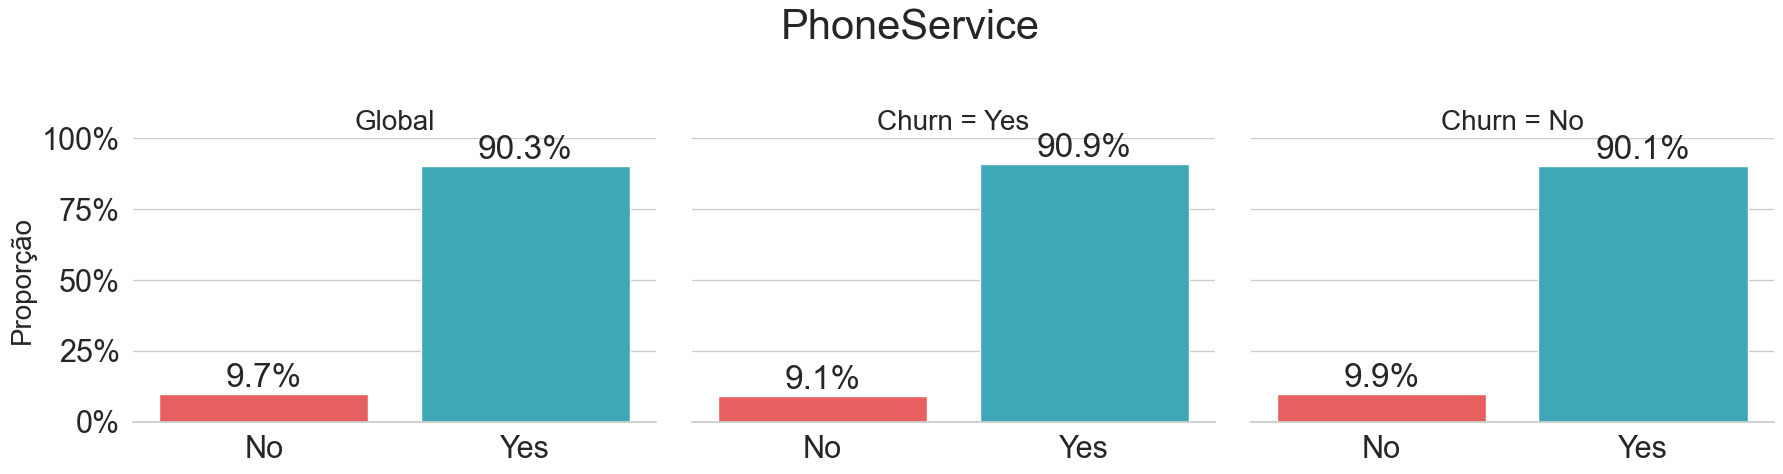

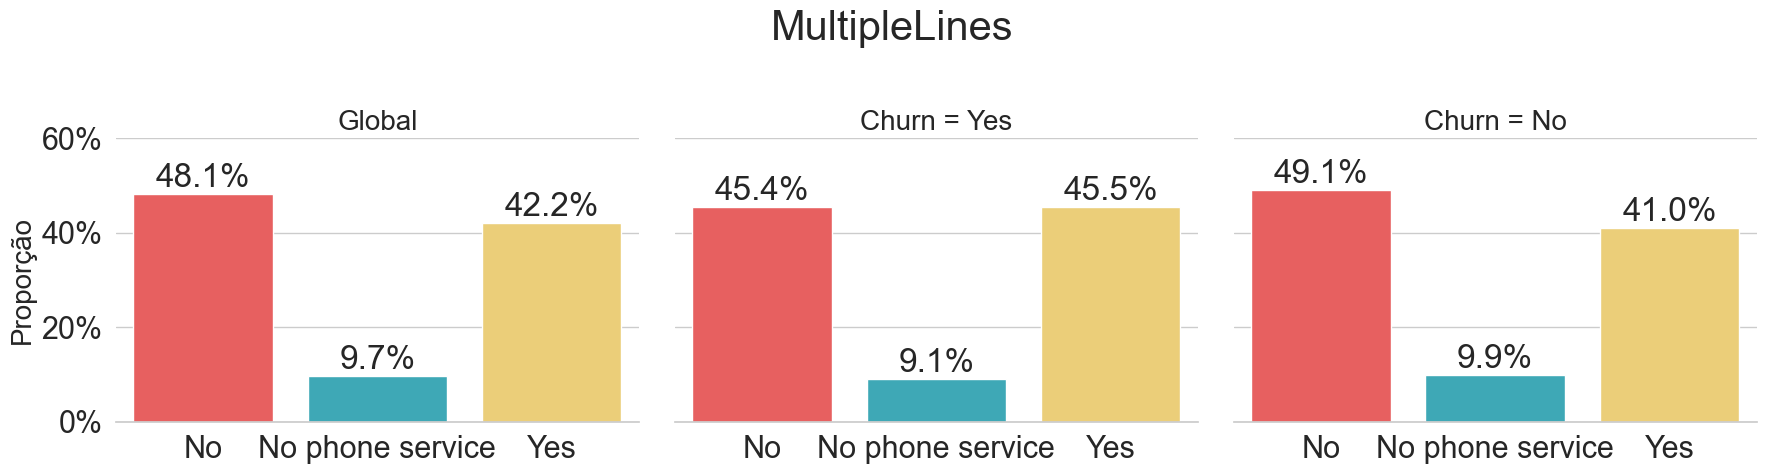

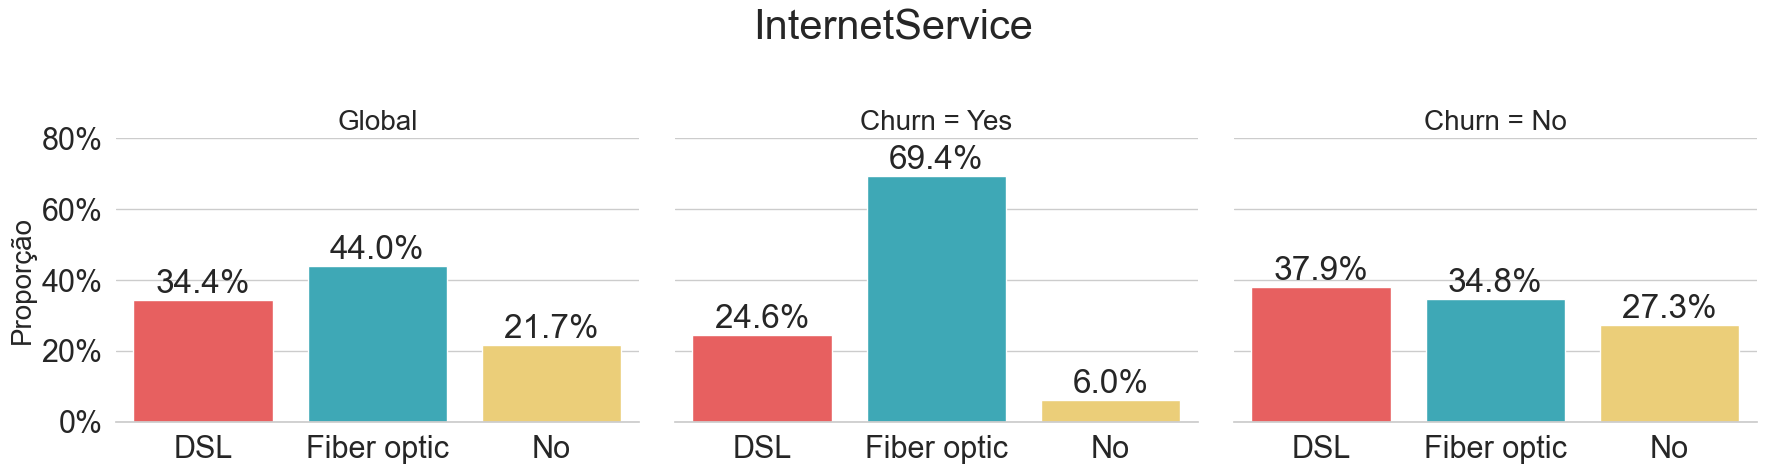

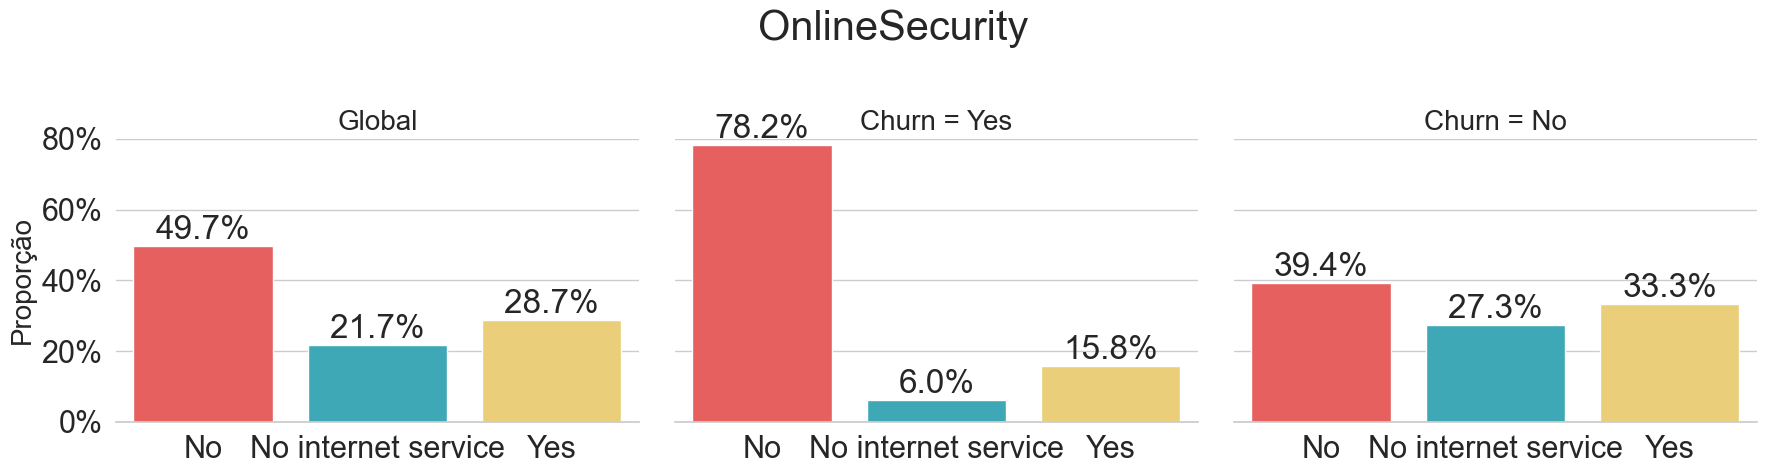

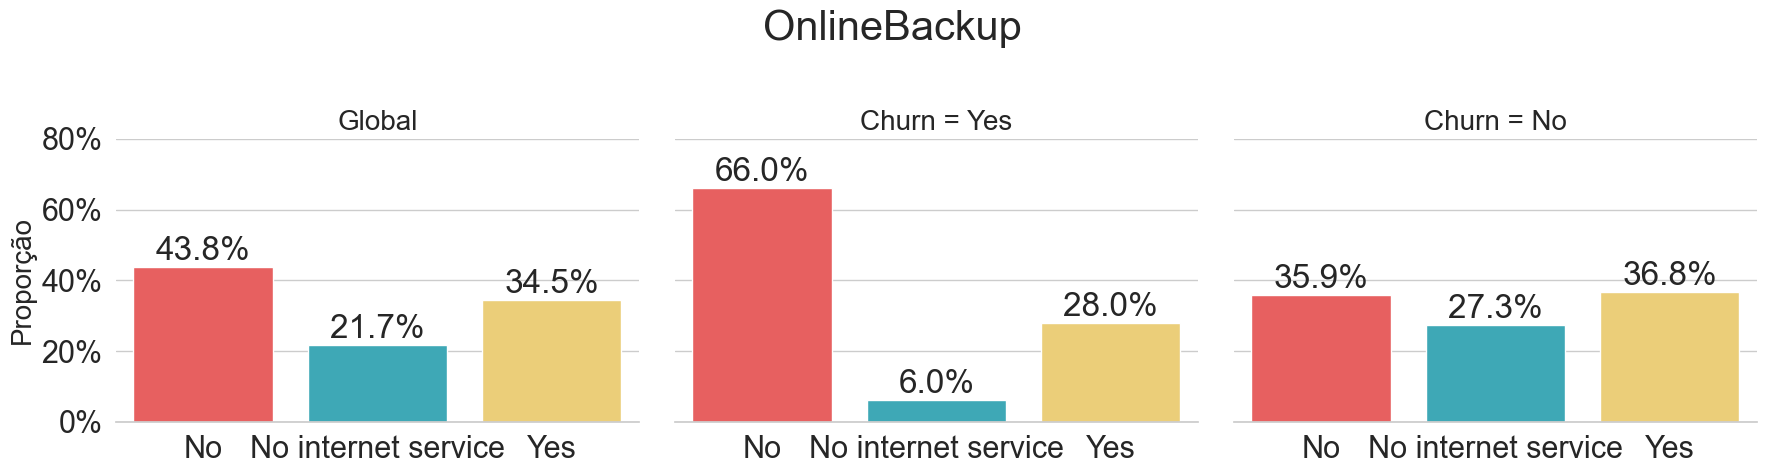

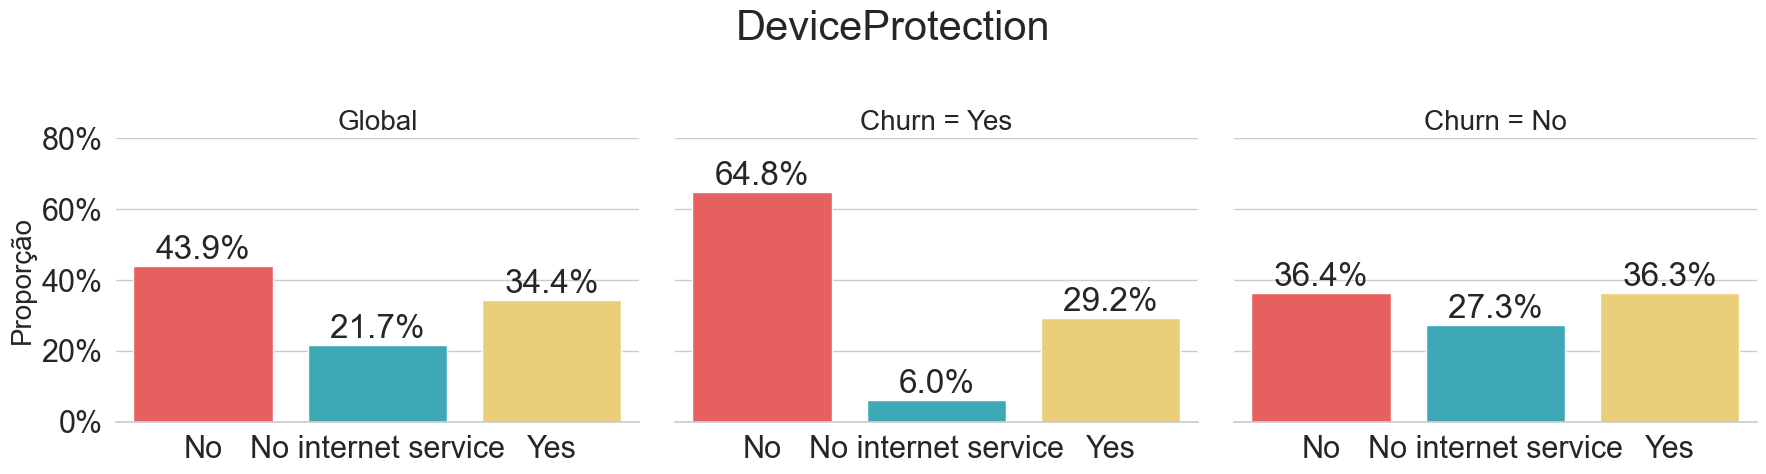

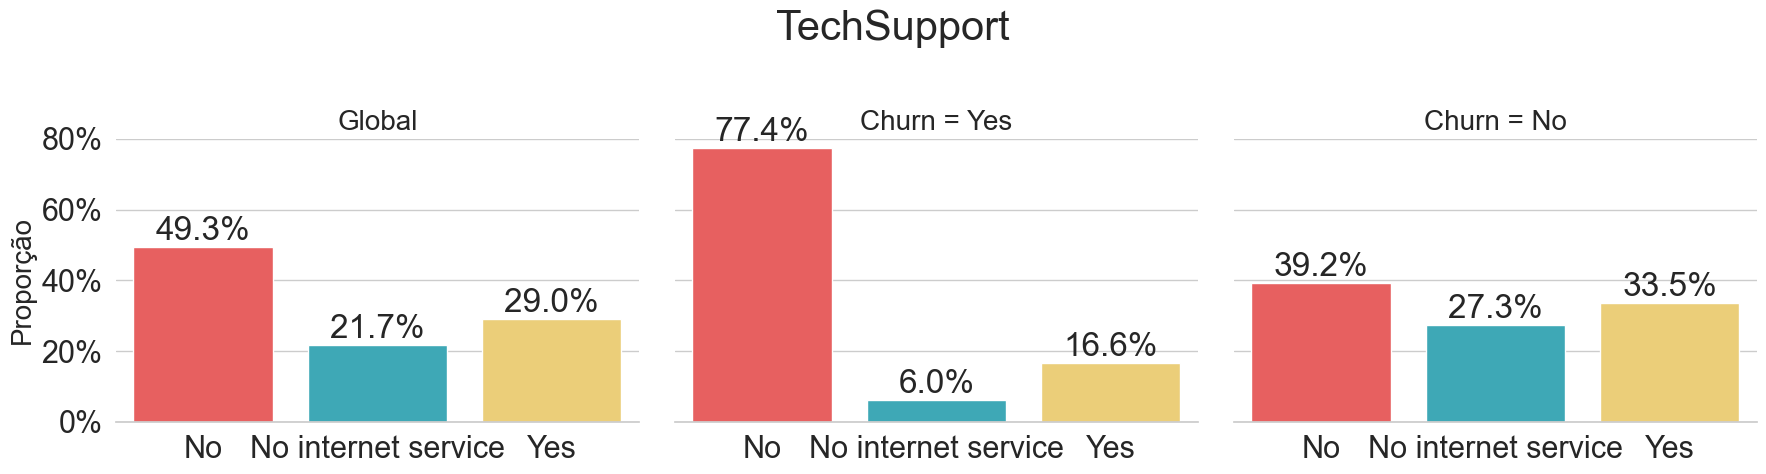

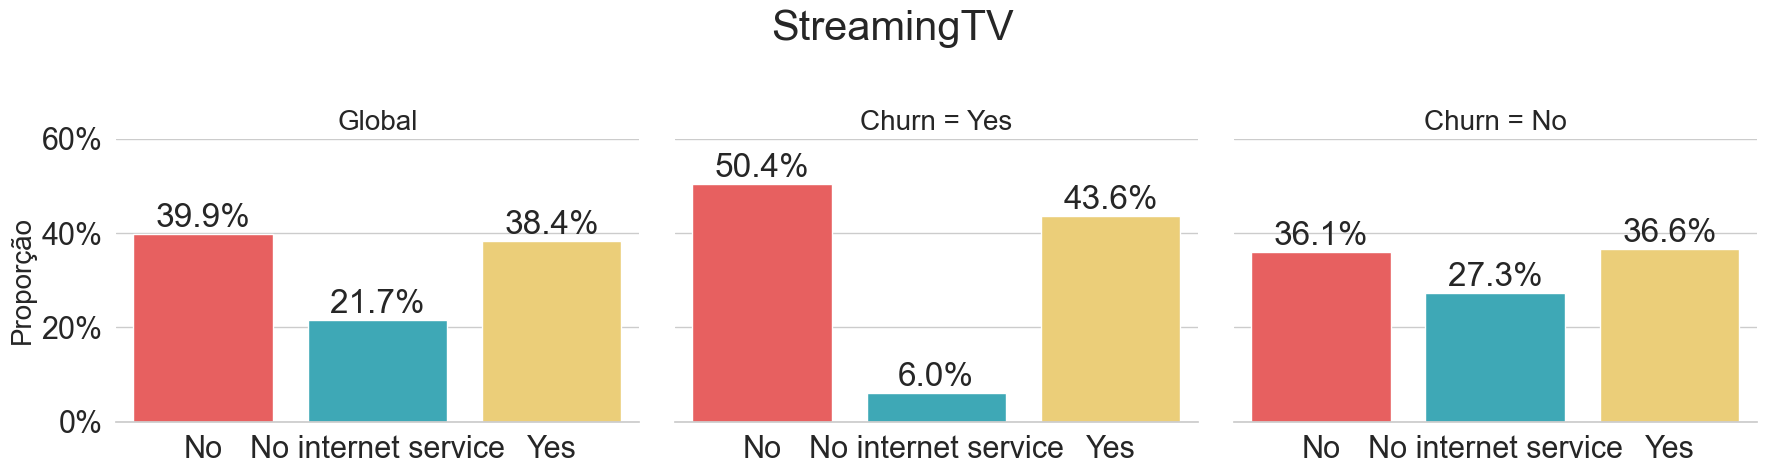

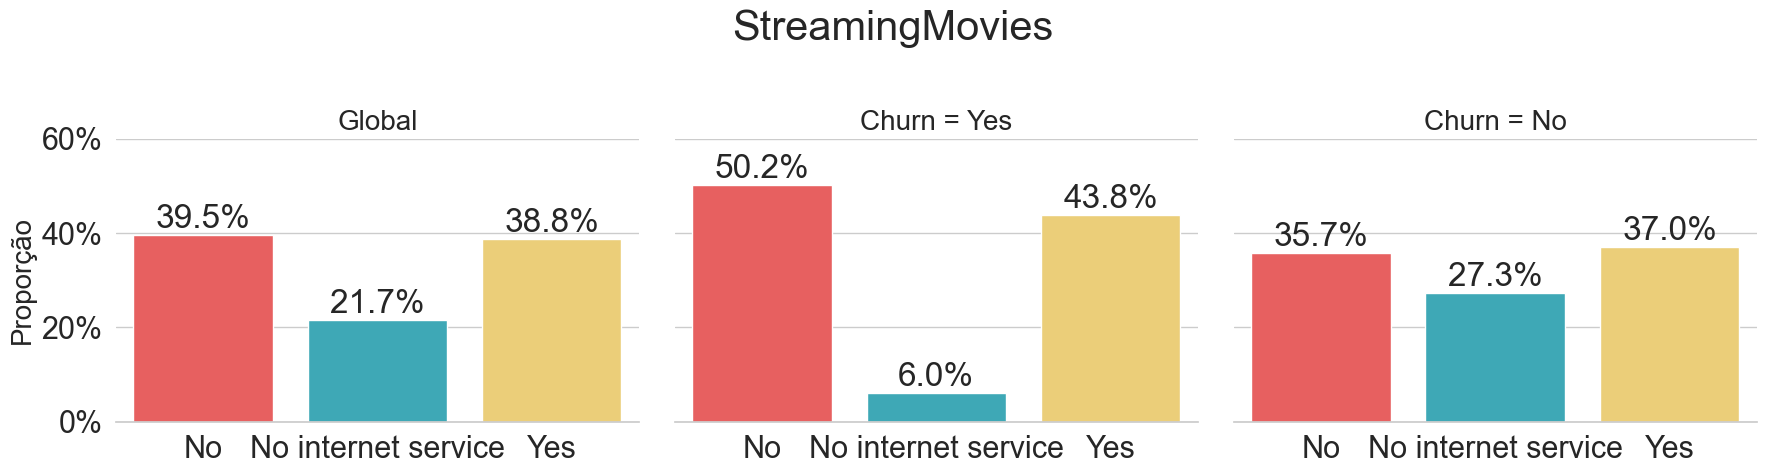

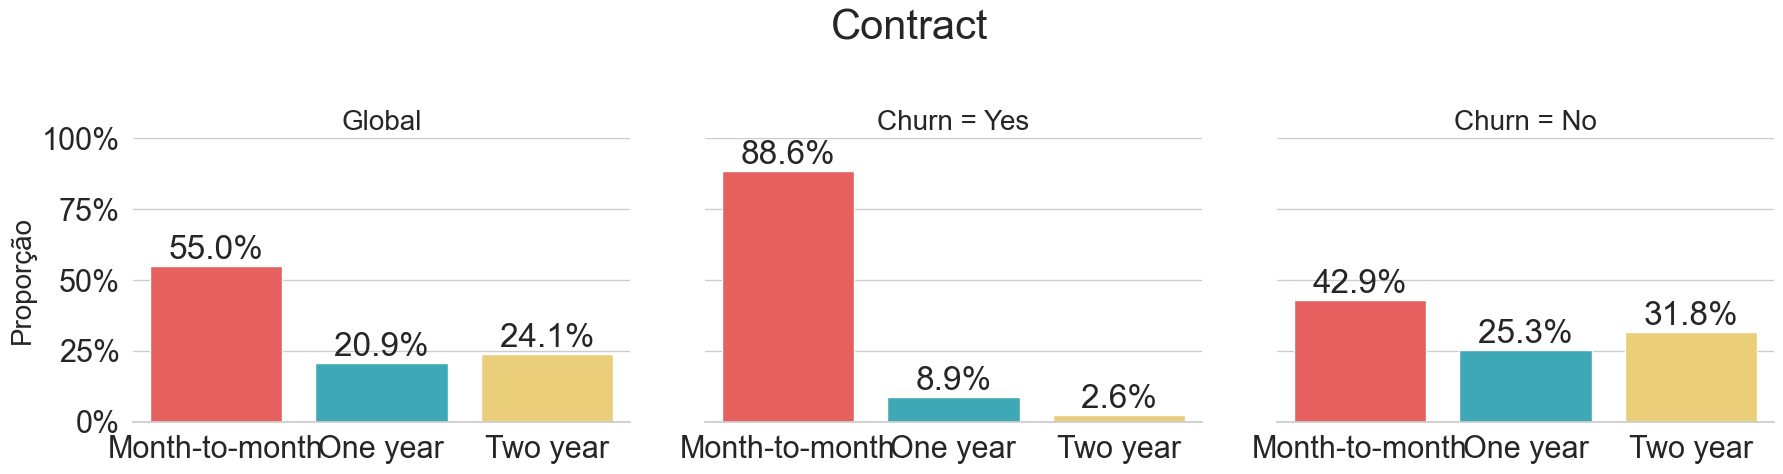

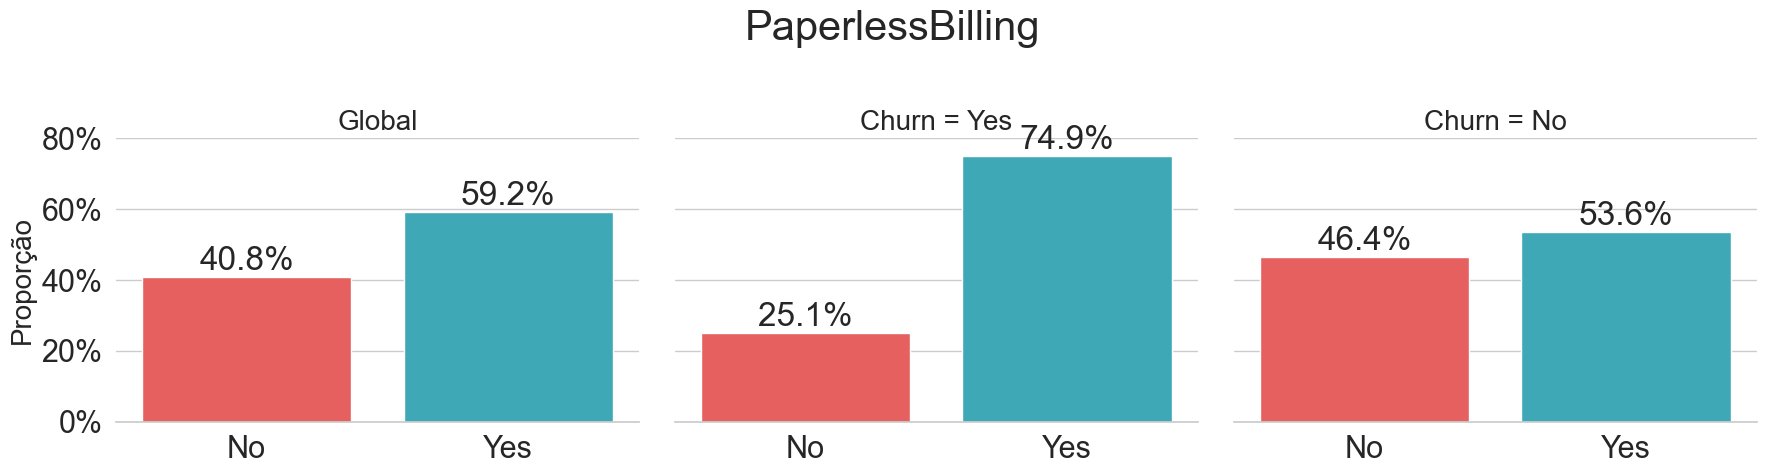

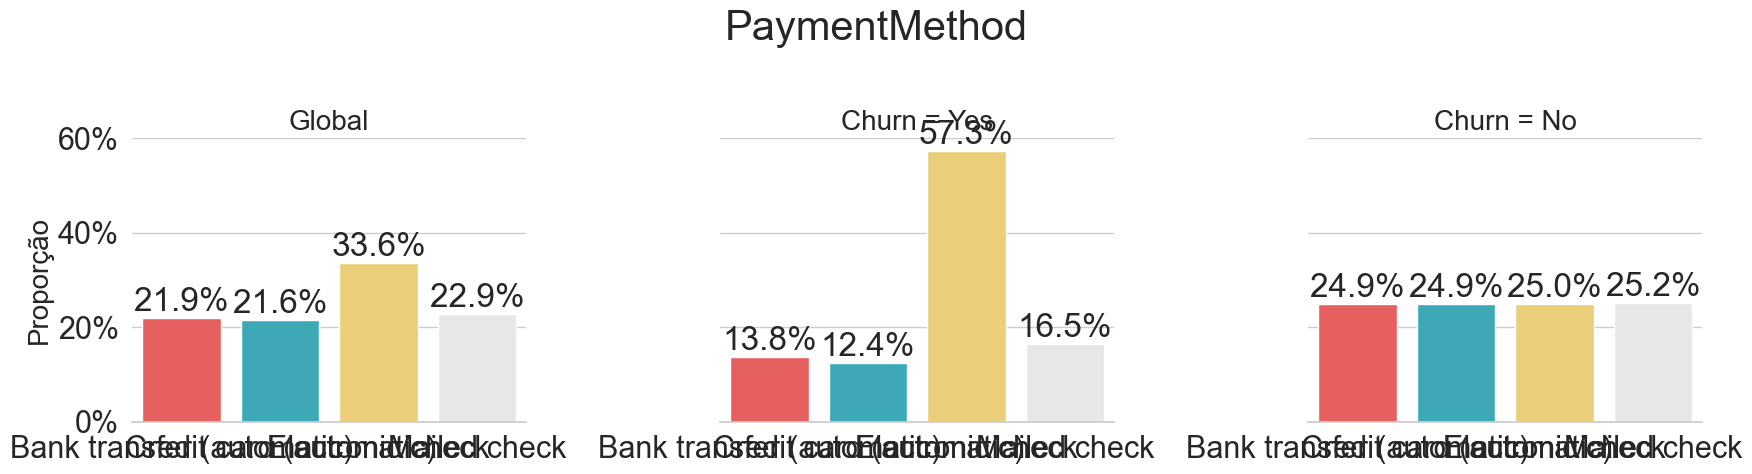

In [270]:
for v in vars_cat:
    if v=="Churn":
        continue
    fig, ax = plt.subplots(1, 3, figsize=(18,5), sharey=True)
    sns.despine(left=True)
    p1 = df[df["Churn"]=="Yes"].copy()
    p1 = p1[v].value_counts(normalize=True, dropna=False).reset_index().sort_values(by=v)

    p2 = df[df["Churn"]=="No"].copy()
    p2 = p2[v].value_counts(normalize=True, dropna=False).reset_index().sort_values(by=v)

    p3 = df[v].value_counts(normalize=True, dropna=False).reset_index().sort_values(by=v)


    sns.barplot(data=p3, x=v, y="proportion", hue=v, palette=cores, ax=ax[0])
    sns.barplot(data=p1, x=v, y="proportion", hue=v, palette=cores, ax=ax[1])
    sns.barplot(data=p2, x=v, y="proportion", hue=v, palette=cores, ax=ax[2])

    ax[0].set_title("Global", size=20)
    ax[1].set_title("Churn = Yes", size=20)
    ax[2].set_title("Churn = No", size=20)

    ax[0].set_ylabel("Proporção", size=20)

 

    r = np.array([0,.2,.4,.6,.8,1])
    m = np.max([p3["proportion"].max(),p2["proportion"].max(),p1["proportion"].max()])
    di = m - np.array([0,.2,.4,.6,.8,1])
    m = r[(di<0)]
    m = np.min(m)
    ax[0].set_ylim((0,m))
    ax[1].set_ylim((0,m))
    ax[2].set_ylim((0,m))


    for a in ax:
        a.set_xlabel("")
        try:
            a.get_legend().remove()
        except:
            pass
        for i in range(len(p3)):
            a.bar_label(
                a.containers[i], 
                labels=["{:.1f}%".format(x*100) for x in a.containers[i].datavalues])
            
    fig.suptitle(v, size=30)
    fig.tight_layout()

    labs = []
    for k in ax[0].get_yticklabels():
        labs.append(("{:.0f}%".format(float(k.get_text())*100)))
    ax[0].set_yticklabels(labs)

In [264]:
labs

['0.000000%',
 '0.100000%',
 '0.200000%',
 '0.300000%',
 '0.400000%',
 '0.500000%',
 '0.600000%']

In [256]:

labs = []
for k in ax[0].get_yticklabels():
    labs.append(("{:.0f}%".format(float(k.get_text())*100)))
labs

ValueError: could not convert string to float: '0%'

C:\Users\Renan\AppData\Local\Temp\ipykernel_18852\1773905785.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(labs)


[Text(0, 0.0, '0%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.4, '40%'),
 Text(0, 0.6000000000000001, '60%')]